В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max.columns',100)

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('data/cars.csv')

In [3]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# Виводимо перелік стовпців, їх типів і інформації про кількість непорожніх значень у кожному стопвці
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
# Визначаємо числові стовпці
cars_df.select_dtypes(include="number").columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [6]:
# Визначаємо кількість числових стовпців
len(cars_df.select_dtypes(include="number").columns)

8

In [7]:
# Визначаємо категоріальні стовпці
cars_df.select_dtypes(include="object").columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [8]:
# Визначаємо кількість категоріальних стовпців
len(cars_df.select_dtypes(include="object").columns)

5

In [9]:
# Визначаємо скільки значень є в кожному категоріальному стовпці
cars_df[cars_df.select_dtypes(include="object").columns].nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

In [10]:
# Визначаємо які саме значення містить кожен категоріальний стовпець
brands = cars_df['Brand'].unique()
models = cars_df['Model'].unique()
fuel_types = cars_df['Fuel_Type'].unique()
transmissions = cars_df['Transmission'].unique()
owner_types = cars_df['Owner_Type'].unique()

print('Категоріальний стовпець Brand містить значення:', brands)
print('\nКатегоріальний стовпець Model містить значення:', models)
print('\nКатегоріальний стовпець Fuel_Type містить значення:', fuel_types)
print('\nКатегоріальний стовпець Transmission містить значення:', transmissions)
print('\nКатегоріальний стовпець Owner_Type містить значення:', owner_types)

Категоріальний стовпець Brand містить значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Категоріальний стовпець Model містить значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']

Категоріальний стовпець Fuel_Type містить значення: ['Petrol' 'Diesel']

Категоріальний стовпець Transmission містить значення: ['Manual' 'Automatic']

Категоріальний стовпець Owner_Type містить значення: ['First' 'Second' 'Third']


**В наборі даних 8 числових і 5 категоріальних стовпців, з них:**
- 2 бінарні (мають лише 2 значення) – `Fuel_Type` і `Transmission`
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку – `Brand` і `Model`
- 1 мультикатегоріальний стовпець, в якому можна встановити відношення порядку – `Owner_Type`

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [11]:
# Визначаємо вхідні дані і таргет
inputs = cars_df.drop('Price',axis = 1)
targets = cars_df['Price']

In [12]:
# Розділяємо дані на тпенувльні і тест
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
# Для кодування стопця Fuel_Type визначаємо яка категорія містить більше значень у стовпці 
cars_df['Fuel_Type'].value_counts()

Petrol    52
Diesel    48
Name: Fuel_Type, dtype: int64

In [14]:
# Кодуємо стовпець Fuel_Type, присвоївши 1 категорії Petrol, а 0 – категорії Diesel
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_code'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_code'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [15]:
# Для кодування стопця Transmission визначаємо яка категорія містить більше значень у стовпці 
cars_df['Transmission'].value_counts()

Automatic    57
Manual       43
Name: Transmission, dtype: int64

In [16]:
# Кодуємо стовпець Transmission, присвоївши 1 категорії Automatic, а 0 – категорії Manual
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_code'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_code'] = X_test.Transmission.map(Transmission_codes)

In [17]:
display(X_train.head(), X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


In [18]:
# Кодуємо стовпець Brand
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot_train

one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot_test

In [19]:
display(X_train.head(), X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [21]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [22]:
# Змінюємо тип даних стовпця з кодами Car_ID (він нам не потрібен як числовий)
X_train['Car_ID'] = X_train['Car_ID'].astype('str')
X_test['Car_ID'] = X_test['Car_ID'].astype('str')

In [23]:
# Видаляємо НЕчислові стовпці
columns_to_be_deleted = X_train.select_dtypes('object').columns

X_train.drop(columns = columns_to_be_deleted, inplace = True)
X_test.drop(columns = columns_to_be_deleted, inplace = True)

In [24]:
# Створимо копію набору X_train і об’єднаємо його з y_train
X_train_copy = X_train.copy()
X_train_copy['y'] = y_train
X_train_copy.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,y
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [25]:
# Будуємо матрицю кореляції
X_train_copy_corr = X_train_copy.select_dtypes(include = 'number').corr()
X_train_copy_corr

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,y
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


**З даних кореляційної матриці можна зробити висновок, що на цільову змінну (ціну) найбільший вплив мають 4 чинники:**
- `Engine` – коефіцієнт кореляції 0,7 
- `Mileage` – коефіцієнт кореляції -0,6 (негативний вплив)
- `Power` – коефіцієнт кореляції 0,8 
- `Transmission_code` – коефіцієнт кореляції 0,6

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [26]:
# Тренуємо модель на усіх числових даних X_train
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-1.03539595e+04, -1.08744370e+01, -3.86667124e+04, -3.75858737e+01,
         6.14075646e+03, -2.35301226e+03, -3.70607514e+05,  2.36367638e+05,
         7.58803045e+05,  7.30326849e+05, -3.05098169e+05, -1.89002506e+05,
        -5.05043272e+05, -5.74912608e+05, -3.94216231e+05,  7.33974724e+05,
        -1.26504171e+05,  1.30457503e+05, -2.58785164e+05,  6.62783066e+04]),
 22529791.832424674)

In [27]:
# Знаходимо передбачення на X_train
predictions_train = lin_reg.predict(X_train)
predictions_train

array([1203925.77474461, 2731441.38306314, 2769166.76820901,
        599429.0578638 , 2958456.62372657, 2825412.00893983,
       3149956.16799869,  613741.70699671, 2149435.68072917,
        698599.65752159,  859280.85842135, 2784454.62516147,
       3149956.16799869,  491600.81323317, 2781250.61769835,
       2139847.39877199, 3653360.39259241, 1104496.39954628,
       1405667.30101032, 1405667.30101032, 1649619.22855154,
       2336963.24644985, 2759124.4317618 , 1856744.73871982,
       2825412.00893983,  574063.95951326,  854201.83861162,
        709072.53082323,  496864.75185441,  190972.02618638,
       3384754.62224927, 2759124.4317618 , 2769166.76820901,
        613741.70699671,  327737.30285084,  698599.65752159,
       1669952.22522836, 3251081.73180011,  859033.35605001,
        859280.85842135, 1063788.22625353, 3384754.62224927,
        947318.02495077, 1209752.72763431, 3031495.29850914,
       1667157.85771186, 3031495.29850914,  788616.81171697,
        759696.61514157,

In [28]:
# Рахуємо точність прогнозу RMSE для X_train
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
rmse_train

210342.8016204635

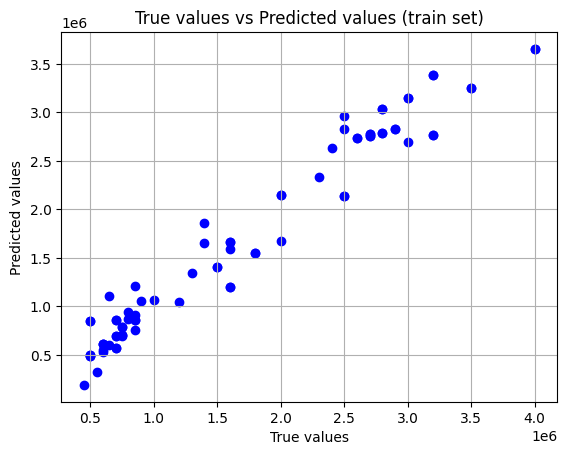

In [29]:
# Будуємо графік розсіювання передбачень проти реальних даних на тренувальному наборі
plt.scatter(y_train, predictions_train, color = 'blue')
plt.title('True values vs Predicted values (train set)')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

In [30]:
# Знаходимо передбачення на X_test
predictions_test = lin_reg.predict(X_test)

In [31]:
# Рахуємо точність прогнозу RMSE для X_test
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)
rmse_test

259601.26542723455

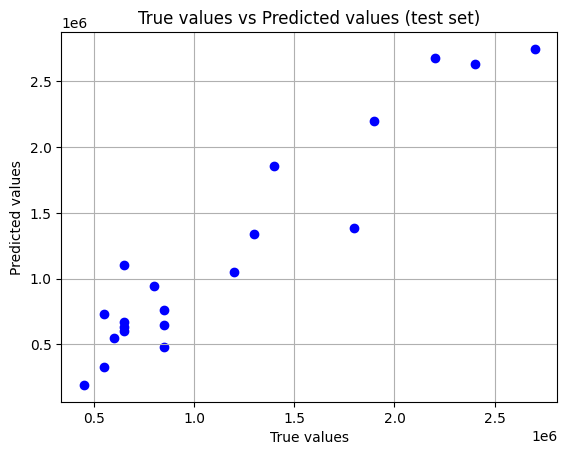

In [32]:
# Будуємо графік розсіювання передбачень проти реальних даних на тестовому наборі
plt.scatter(y_test, predictions_test, color = 'blue')
plt.title('True values vs Predicted values (test set)')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.show()

**Висновок:**

Втрати на тренувальних даних нижчі за втрати на тестових (210342.8016204635 проти 259601.26542723455), це може бути пояснено тим, що у тестовому наборі дані, які модель не бачила, і там можуть бути якісь свої додаткові закономірності. Тому модель потребує доопрацювання.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [33]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [35]:
X_train_scaled_num_inputs = scaler.transform(X_train[numeric_cols])

In [36]:
cat_cols = ['Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford', 'Honda','Hyundai','Mahindra','Maruti','Mercedes','Tata','Toyota','Volkswagen','Owner_Type_Codes']
categorical_data = X_train[cat_cols].values

In [37]:
inputs = np.concatenate((X_train_scaled_num_inputs, categorical_data), axis=1)
column_names = numeric_cols + cat_cols
X_train_scaled = pd.DataFrame(inputs, columns = column_names)
X_train_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
# Масштабуємо незалежні змінні на тестувальних даних
X_test_scaled_num_inputs = scaler.transform(X_test[numeric_cols])
categorical_data_test = X_test[cat_cols].values

inputs_test = np.concatenate((X_test_scaled_num_inputs, categorical_data_test), axis=1)
column_names_test = numeric_cols + cat_cols
X_test_scaled = pd.DataFrame(inputs_test, columns = column_names_test)
X_test_scaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [39]:
# Тренуємо модель на відмасштабованих даних
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_scaled, y_train)
lin_reg1.coef_, lin_reg1.intercept_

(array([ -11604.26097548,  -99713.958682  , -131884.63312348,
         -24683.08408026,  500000.50676501,   -1744.04881186,
        -370607.51447606,  236367.63769857,  758803.04507446,
         730326.84900821, -305098.16914034, -189002.50587607,
        -505043.27217328, -574912.6081589 , -394216.23110358,
         733974.72434567, -126504.17089306,  130457.50322997,
        -258785.16431308,   66278.30657908]),
 1604275.6061189394)

In [40]:
predictions_train_scaled = lin_reg1.predict(X_train_scaled)

In [41]:
# Рахуємо точність прогнозу RMSE для X_train_scaled
rmse_train_scaled = mean_squared_error(y_train, predictions_train_scaled, squared=False)
rmse_train_scaled

210342.80162046402

In [42]:
# Рахуємо прогноз і його точність для X_test_scaled
predictions_test_scaled = lin_reg1.predict(X_test_scaled)
rmse_test_scaled = mean_squared_error(y_test, predictions_test_scaled, squared=False)
rmse_test_scaled

259601.26542723452

In [43]:
# Рахуємо ваги для визначення найвпливовіших коефіцієнтів 
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(lin_reg1.coef_, lin_reg1.intercept_)
})
weights_df.sort_values('weight', ascending = False)

,feature,weight
20,1,1.604276e+06
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
4,Power,5.000005e+05
7,Transmission_code,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


**Висновок:**
1) Найбільший позитивний вплив на формування ціни мають марка авто (марка `Audi`, `Mercedes` чи `BMW` додає ціни), також `Power` (більш потужне авто має більшу ціну), `Transmission_code` (авто з автоматичною коробкою передач має більшу ціну).
2) Серед параметрів з негативним впливом на ціну, якщо не брати до уваги марку авто, можна відмітити пробіг `Kilometers_Driven`, що логічно (більший пробіг – менша ціна), бензин як тип палива `Fuel_Type_code`, пиливна ефективність `Mileage`.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [44]:
Y = np.expand_dims(y_train, axis = 1)
X = X_train_scaled
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                1.470586e+06
Year                -1.160426e+04
Kilometers_Driven   -9.971396e+04
Mileage             -1.318846e+05
Engine              -2.468308e+04
Power                5.000005e+05
Seats               -1.744049e+03
Fuel_Type_code      -3.706075e+05
Transmission_code    2.363676e+05
Audi                 8.924927e+05
BMW                  8.640165e+05
Ford                -1.714085e+05
Honda               -5.531287e+04
Hyundai             -3.713536e+05
Mahindra            -4.412230e+05
Maruti              -2.605266e+05
Mercedes             8.676644e+05
Tata                 7.185463e+03
Toyota               2.641471e+05
Volkswagen          -1.250955e+05
Owner_Type_Codes     6.627831e+04
dtype: float64

In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.34e-34
Time:                        22:31:29   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.471e+06   7.09e+0

**Статзначущими ознаками на рівні значущості 0,05 є:**
- константа
- Mileage
- Power
- Fuel_Type_code
- Transmission_code
- марки Audi, BMW, Hyundai, Mahindra, Maruti, Mercedes, Toyota

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [46]:
Y_cut = np.expand_dims(y_train, axis = 1)
X_cut = X_train_scaled[['Mileage', 'Power', 'Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota']]
X_cut = sm.add_constant(X_cut)
model_cut = sm.OLS(Y_cut,X_cut)
results_cut = model_cut.fit()
results_cut.params

const                1.347926e+06
Mileage             -9.871469e+04
Power                4.626079e+05
Fuel_Type_code      -2.644347e+05
Transmission_code    2.546451e+05
Audi                 9.664675e+05
BMW                  1.060240e+06
Hyundai             -3.073476e+05
Mahindra            -2.859407e+05
Maruti              -1.178075e+05
Mercedes             1.017277e+06
Toyota               2.597025e+05
dtype: float64

In [47]:
print(results_cut.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.53e-41
Time:                        22:31:44   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.348e+06   6.68e+0

**Висновок:**
R-squared і Adj.R-squared майже не змінились (0,959 проти 0,954 та 0,946 проти 0,947), тобто початкова модель і модель, що враховує лише статзначущі ознаки, пояснюють приблизно той самий відсоток варіації у залежних змінних.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [48]:
Y_cut_2 = np.expand_dims(y_train, axis = 1)
X_cut_2 = X_train_scaled.drop(columns = ['Year', 'Engine', 'Seats', 'Honda', 'Tata', 'Owner_Type_Codes'])
X_cut_2 = sm.add_constant(X_cut_2)
model_cut_2 = sm.OLS(Y_cut_2,X_cut_2)
results_cut_2 = model_cut_2.fit()
results_cut_2.params

const                1.413590e+06
Kilometers_Driven   -7.887639e+04
Mileage             -1.233571e+05
Power                4.652078e+05
Fuel_Type_code      -3.233013e+05
Transmission_code    2.406438e+05
Audi                 9.544121e+05
BMW                  9.680075e+05
Ford                -5.747514e+04
Hyundai             -2.711095e+05
Mahindra            -3.574766e+05
Maruti              -1.756151e+05
Mercedes             9.528979e+05
Toyota               3.030894e+05
Volkswagen          -1.709079e+04
dtype: float64

In [49]:
print(results_cut_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.79e-39
Time:                        22:32:23   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      65   BIC:                             2255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.414e+06   8.88e+0

**Висновок:**
Враховуючи, що в останньому випадку (з пом’якшеним критерієм відбору ознак), показник Adj.R-squared найбільший (0,949) серед трьох моделей, краще залишити цю модель.